In [1]:
import time
import copy
import numpy as np
from skimage.filters import gaussian_filter
import cv2

import matplotlib.pyplot as plt
import pylab as pl

%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

from tifffile import imread, imsave
import cPickle as pickle

%reload_ext autoreload
%autoreload 2

from netsurface2d import NetSurf2d
from data3d import Data3d

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# Load time-lapse data...

In [102]:
# filename = '/Users/jug/Repositories/GIT/BobSeg/TestLapseData2d_151119-nmy2GFP-tagRfpPH-wt-04_w1LMM_488+488_LP_myTestCrop_bgrem.tif'
filename = '/Users/jug/Dropbox/ProjectGoldstein/4MyosinMembraneWholeEmbryo.tif'

stack = imread(filename)
print 'Stack shape:',stack.shape

segchannel = stack[:,0,:,:]
flowchannel = stack[:,1,:,:]
sigma = [0.,2.,2.]
segchannel_smooth = gaussian_filter(segchannel,sigma)

print 'Segchannel shape:',segchannel.shape
print 'Single image:',segchannel[0].shape

Stack shape: (75, 2, 356, 610)


/Users/jug/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/skimage/filters/_gaussian.py:13: skimage_deprecation: Call to deprecated function ``gaussian_filter``. Use ``skimage.filters.gaussian`` instead.
  multichannel=None):


Segchannel shape: (75, 356, 610)
Single image: (356, 610)


In [103]:
max_rs = (segchannel[0].shape[1] / 3,
          segchannel[0].shape[1] / 3)

min_rs = (5,5)
print min_rs, max_rs

(5, 5) (203, 203)


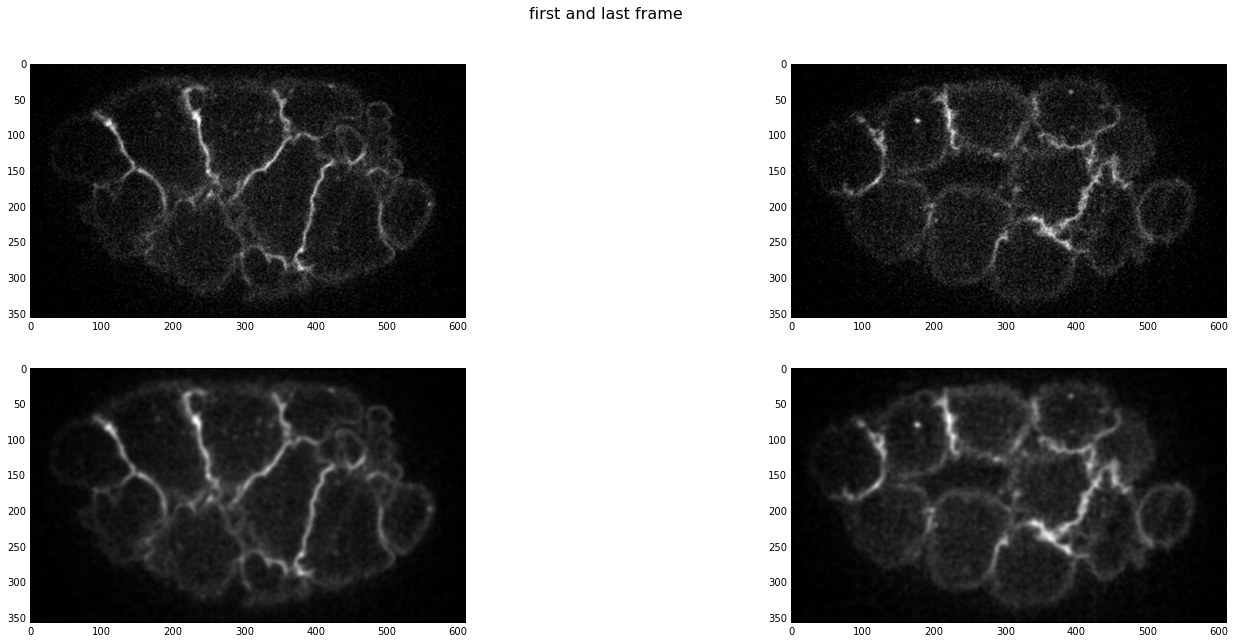

In [104]:
fig = plt.figure()
fig.suptitle('first and last frame', fontsize=16)
ax = fig.add_subplot(221)
ax.imshow(segchannel[0], plt.get_cmap('gray'))
ax = fig.add_subplot(222)
ax.imshow(segchannel[-1], plt.get_cmap('gray'))
ax = fig.add_subplot(223)
ax.imshow(segchannel_smooth[0], plt.get_cmap('gray'))
ax = fig.add_subplot(224)
ax.imshow(segchannel_smooth[-1], plt.get_cmap('gray'))

## adding E cells

In [110]:
data = Data3d( segchannel_smooth, pixelsize=(1.,1.), silent=False )
data.set_seg_params(num_columns=50,K=100,max_delta_k=8)
objects = []

In [111]:
Ea = data.init_object("Ea")
objects.append(Ea)

Ep = data.init_object("Ep")
objects.append(Ep)

In [112]:
data.add_object_at( Ea, min_rs, max_rs, frame=0, seed=(350,200), segment_it=True )
data.track(Ea, seed_frame=0, target_frames=range(1,len(data.images)), recenter_iterations=1)

Added appearance for "Ea" in frame 0 with seed coordinates [ 350.  200.]
      Optimum energy:  21.3413287198
      Nodes in/out:  1623 3377
      Area:  14108.0
Added appearance for "Ea" in frame 1 with seed coordinates [ 350.  200.]
      Optimum energy:  21.06500058
      Nodes in/out:  1612 3388
      Area:  13896.5
    Updated center to [346 197]
Added appearance for "Ea" in frame 2 with seed coordinates [ 346.  197.]
      Optimum energy:  21.0842593808
      Nodes in/out:  1623 3377
      Area:  14013.5
    Updated center to [345 195]
Added appearance for "Ea" in frame 3 with seed coordinates [ 345.  195.]
      Optimum energy:  21.1680764341
      Nodes in/out:  1614 3386
      Area:  13703.0
    Updated center to [346 194]
Added appearance for "Ea" in frame 4 with seed coordinates [ 346.  194.]
      Optimum energy:  21.003210835
      Nodes in/out:  1661 3339
      Area:  14496.5
    Updated center to [345 192]
Added appearance for "Ea" in frame 5 with seed coordinates [ 345.

In [113]:
data.add_object_at( Ep, min_rs, max_rs, frame=0, seed=(440,225), segment_it=True )
data.track(Ep, seed_frame=0, target_frames=range(1,len(data.images)), recenter_iterations=1)

Added appearance for "Ep" in frame 0 with seed coordinates [ 440.  225.]
      Optimum energy:  17.5066453376
      Nodes in/out:  1668 3332
      Area:  14703.0
Added appearance for "Ep" in frame 1 with seed coordinates [ 440.  225.]
      Optimum energy:  17.4647203888
      Nodes in/out:  1662 3338
      Area:  14520.5
    Updated center to [439 224]
Added appearance for "Ep" in frame 2 with seed coordinates [ 439.  224.]
      Optimum energy:  17.2834526373
      Nodes in/out:  1622 3378
      Area:  13873.5
    Updated center to [439 223]
Added appearance for "Ep" in frame 3 with seed coordinates [ 439.  223.]
      Optimum energy:  17.1161166131
      Nodes in/out:  1654 3346
      Area:  14442.5
    Updated center to [441 222]
Added appearance for "Ep" in frame 4 with seed coordinates [ 441.  222.]
      Optimum energy:  15.8603622707
      Nodes in/out:  1605 3395
      Area:  13594.5
    Updated center to [441 223]
Added appearance for "Ep" in frame 5 with seed coordinates [ 4

# Save / Load 
_Does not work yet_

In [23]:
data.save('/Users/jug/Repositories/GIT/BobSeg/TestLapseData2d.pkl')

In [ ]:
data = Data3d( segchannel, silent=False )
data.load('/Users/jug/Repositories/GIT/BobSeg/TestLapseData2d.pkl')
objects = range(len(data.object_names))

# Visualisation stuff 

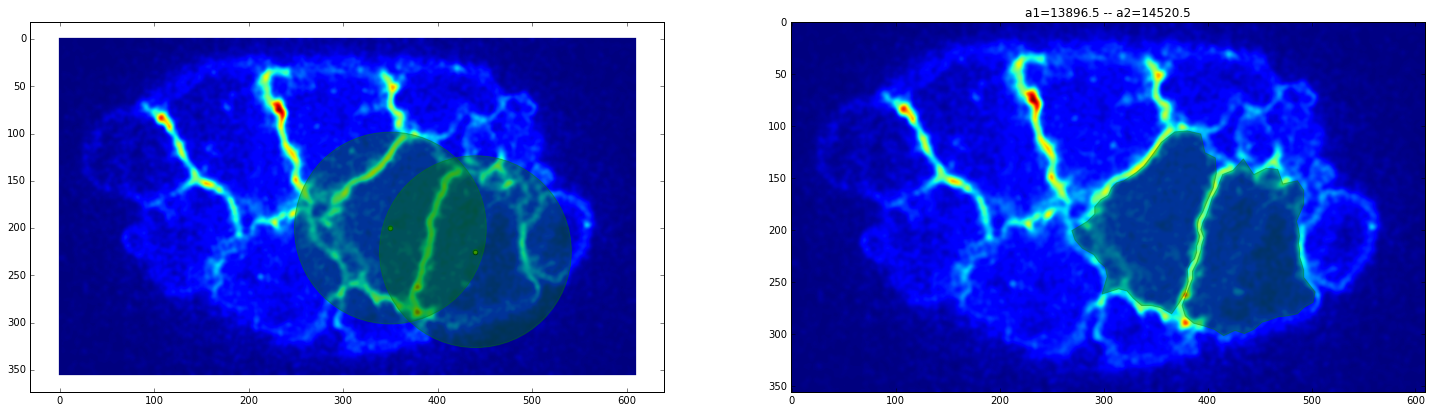

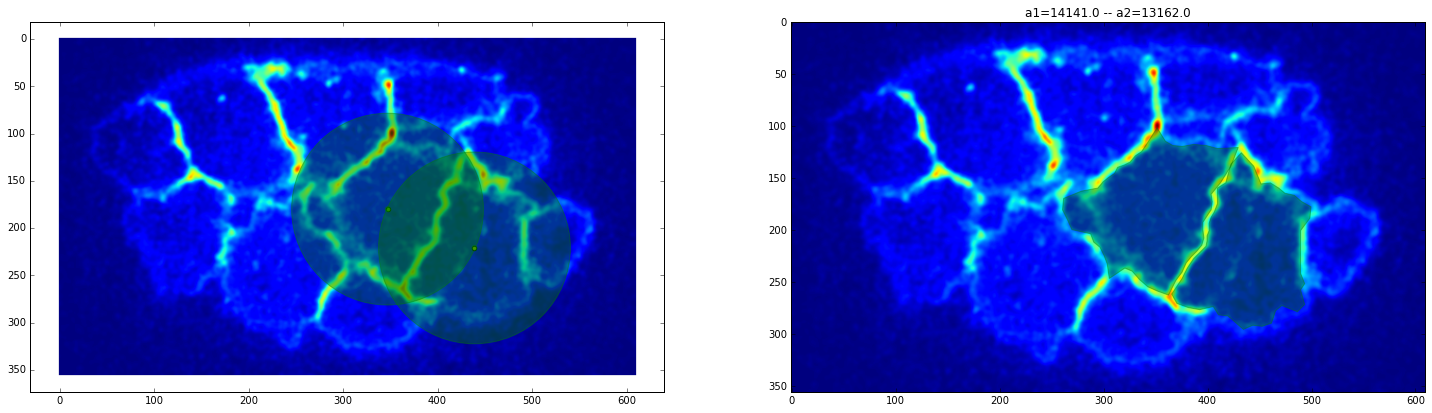

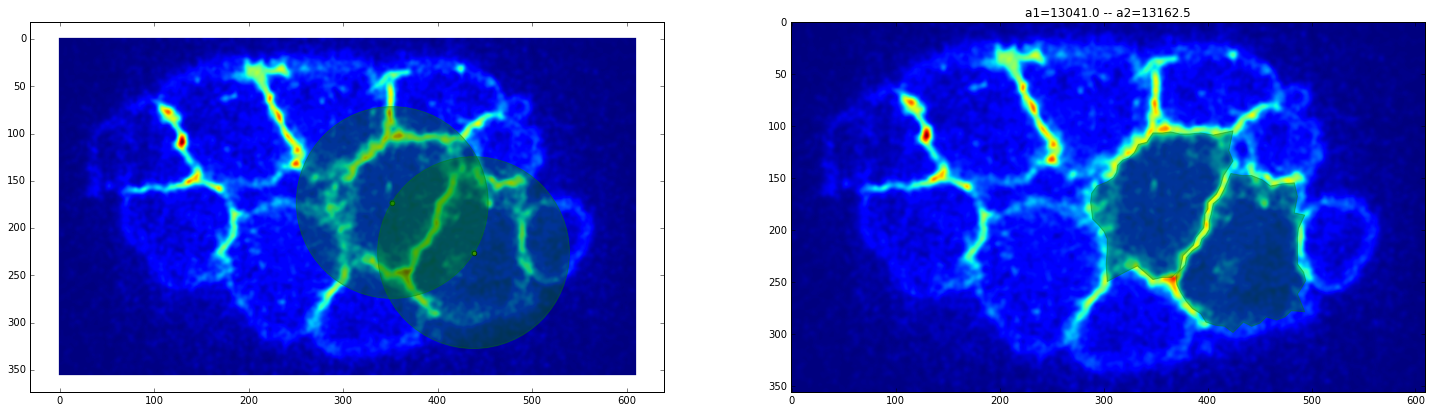

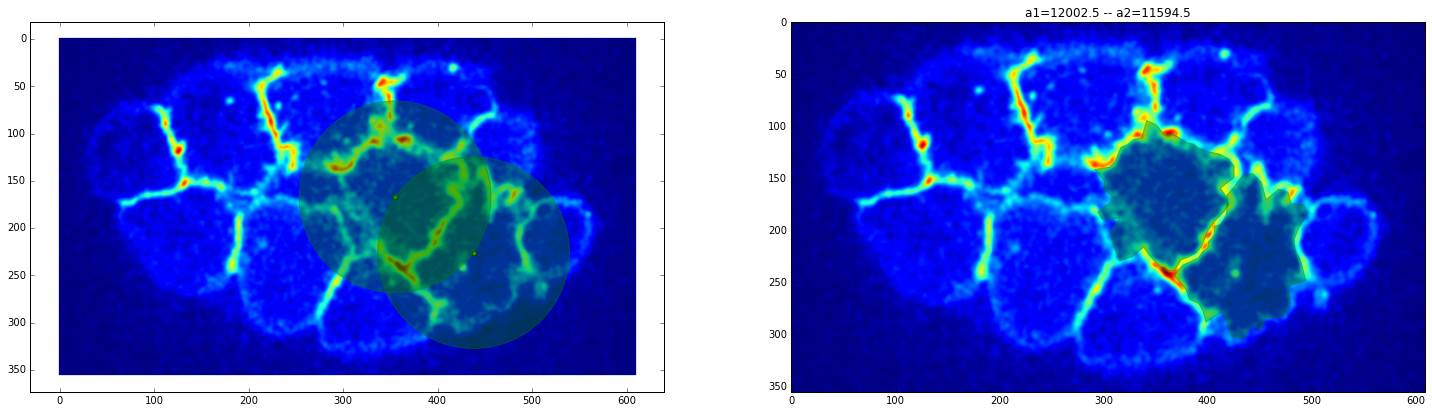

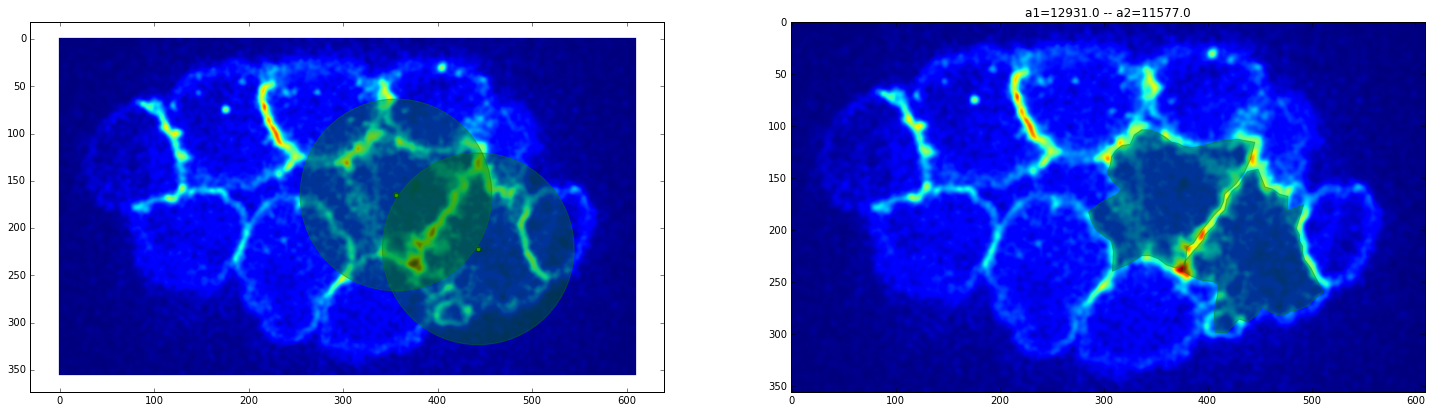

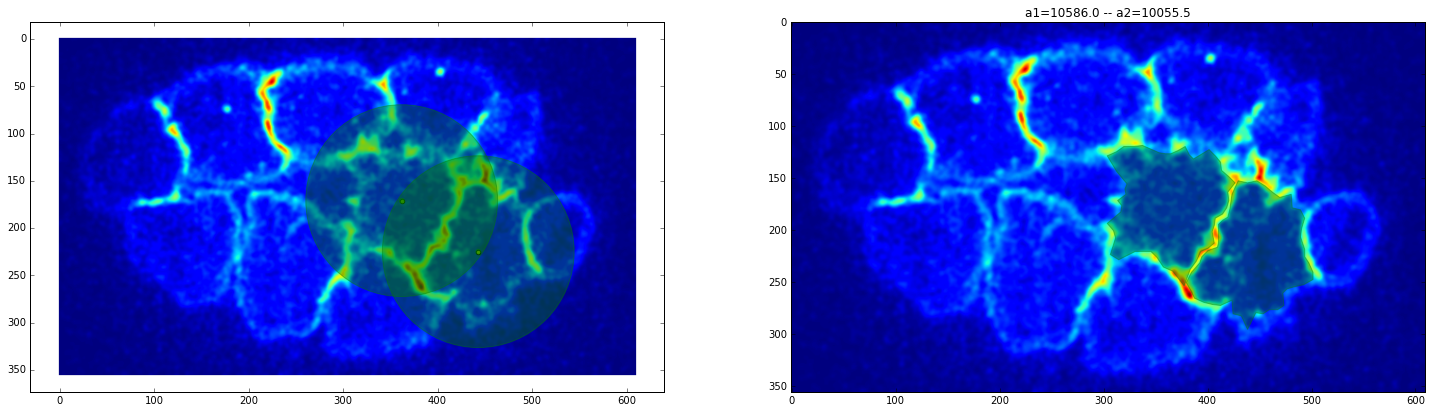

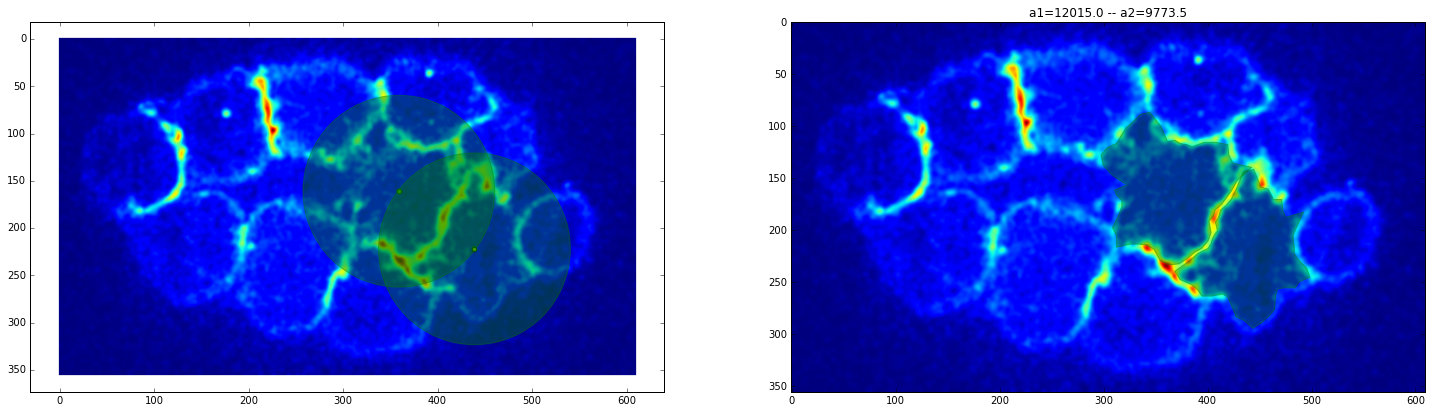

In [85]:
for frame in range(1,len(data.images),len(data.images)/6):
    fig = plt.figure()
    ax = plt.subplot(121)
    data.plot_minmax( frame, ax )
    ax = plt.subplot(122)
    ax.set_title('a1='+str(data.object_areas[0][frame])+' -- a2='+str(data.object_areas[1][frame]))
    data.plot_result( frame, ax )

# FLOW

### See the loaded flow channel images...

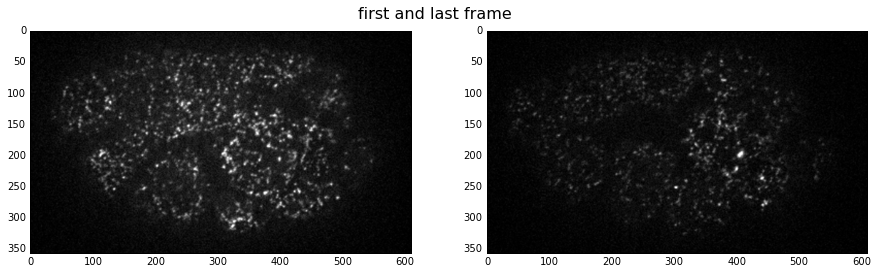

In [86]:
pylab.rcParams['figure.figsize'] = (15, 4)
fig = plt.figure()
fig.suptitle('first and last frame', fontsize=16)
ax = fig.add_subplot(121)
ax.imshow(flowchannel[0], plt.get_cmap('gray'))
ax = fig.add_subplot(122)
ax.imshow(flowchannel[-1], plt.get_cmap('gray'))


In [128]:
def draw_flow(im, im2, flow, step=16, dots=[], dothist=[], polygones=[], show_flow_vectors=True):
    h,w = im.shape[:2]
    y,x = mgrid[step/2:h:step,step/2:w:step].reshape(2,-1)
    fx,fy = flow[y,x].T

    # create image and draw
    vis = cv2.cvtColor(np.zeros_like(im),cv2.COLOR_GRAY2BGR)
    vis[:,:,1] = flowchannel[f]
    vis[:,:,2] = segchannel[f]
    
    # flow arrows
    if ( show_flow_vectors ):
        lines = vstack([x,y,x+fx,y+fy]).T.reshape(-1,2,2)
        lines = int32(lines)

        for (x1,y1),(x2,y2) in lines:
            cv2.line(vis,(x1,y1),(x2,y2),(0,150,150),1)
            cv2.circle(vis,(x1,y1),1,(0,150,150), -1)
        
    # draw polygones
    for polygone in polygones:
        cv2.polylines(vis, np.array([polygone], 'int32'), 1, (208,224,64), 2)
    
    intdots = []
    for i, dot in enumerate(dots):
        # compute new dot
        try:
            fx,fy = flow[dot[1],dot[0]].T
        except:
            continue #drop points that leave the image
        newx = max(0,dot[0]+fx)
        newy = max(0,dot[1]+fy)
        newx = min(im.shape[1]-1,newx)
        newy = min(im.shape[0]-1,newy)
        newdot = ( newx, newy )
        
        # history lines
        color = (255,128,128)
        for j,histdots in enumerate(dothist):
            histdot = histdots[i]
            p1 = ( int(histdot[0]), int(histdot[1]) )
            if len(dothist) > j+1:
                histdot2 = dothist[j+1][i]
            else:
                histdot2 = newdot
            p2 = ( int(histdot2[0]), int(histdot2[1]) )
            cv2.line(vis, p1, p2, color, 1)
            color = tuple(np.array(color)-[10,10,10])
            if min(color) < 0: 
                break
        
        # point
        intdot = ( int(newdot[0]), int(newdot[1]) )
        cv2.circle(vis,intdot, 3, (0,165,255), 1)
        
        intdots.append(intdot)
    
    return vis, np.array(intdots)

In [148]:
# Where to save frames? (None >> not saving!)
folder = None #'/Users/jug/Repositories/GIT/BobSeg/frames2d/'

# Show results in jupyter or in cv2 window
show_inline = False

# -------------------------------------------------------------------------------

if show_inline:
    from IPython.display import clear_output
    pylab.rcParams['figure.figsize'] = (25, 10)
    fig = plt.figure()

prvs = flowchannel[0]
hsv_shape = (prvs.shape[0],prvs.shape[1],3)
hsv = np.zeros(hsv_shape)
hsv[...,1] = 255

dots = data.get_griddots_in(0,Ea,spacing=15)
# dots = data.get_radialdots_in(0,Ea, border_out=10, stepwidth=5)
dots.extend( data.get_griddots_in(0,Ep,spacing=15) )
# dots.extend( data.get_radialdots_in(0,Ep, border_out=10, stepwidth=5) )

dot_history = [dots]
for f in range(flowchannel.shape[0]):
    nxt = flowchannel[f]

    flow = cv2.calcOpticalFlowFarneback(prev=prvs,
                                        next=nxt,
                                        pyr_scale=0.5,
                                        levels=3,
                                        winsize=5,
                                        iterations=15,
                                        poly_n=5,
                                        poly_sigma=1.5,
                                        flags=1)

    cells = [data.get_result_polygone(f,0), 
             data.get_result_polygone(f,1)]
    outframe, dots = draw_flow(flowchannel[f],
                               segchannel[f],
                               flow,
                               dots=dots,
                               dothist=dot_history,
                               polygones=cells,
                               show_flow_vectors=False)
    dot_history.insert(0,dots)
    rgbframe = cv2.cvtColor(outframe, cv2.COLOR_BGR2RGB)

    # save frames if desired
    if not folder is None:
        cv2.imwrite(folder+'frame%4d.png'%(f), outframe)
    
    if show_inline:
        axis('off')
        title("flow")
        imshow(rgbframe)
        show()
        clear_output(wait=True)
        # optional quick exit (DEBUGGING)
        if False and f==3:
            break
    else:
        cv2.imshow('flow',outframe)
        k = cv2.waitKey(25) & 0xff
        if k == 27:
            break
        elif k == ord('s'):
            cv2.imwrite('opticalfb.png',nxt)
            cv2.imwrite('opticalhsv.png',rgbframe)
    
    prvs = nxt
    
cv2.destroyAllWindows()